# Project

## Packages

In [1]:
from bs4 import BeautifulSoup # to parse external data
import yfinance as yf
import pandas as pd # to read CSV files
import requests # to get data
import spacy #to extraxt entities
import matplotlib.pyplot as plt

## RSS feeds

In [2]:
# Check if data from the page are downloadable
yahoo = requests.get("https://finance.yahoo.com/news/rssindex")
yahoo

<Response [200]>

In [3]:
# Get headlines
Tyahoo = BeautifulSoup(yahoo.content, features='xml')
TY = Tyahoo.findAll('title')
TY # list of titles

[<title>Yahoo Finance</title>,
 <title>Yahoo Finance</title>,
 <title>The ‘best job in America’ pays $145,000 and has 14,000 job openings — and offers a generous work-life balance</title>,
 <title>3 Monster Growth Stocks That Could Reach New Highs</title>,
 <title>I inherited ‘a sizeable amount’ from my mother.  A financial adviser took me out for a free meal at an investment seminar, and made ‘some good, interesting points.’  But should I be wary?</title>,
 <title>‘My husband refuses to pay my student loans.’ His reason? I took out the loans before we were together. Is there some loophole to get him to pay?</title>,
 <title>No, the US doesn’t have $30 trillion in debt</title>,
 <title>Why Facebook parent Meta’s stock is getting crushed</title>,
 <title>Amazon stock soars 15% after earnings, will hike Prime membership fee</title>,
 <title>ARK investors have lost $4 billion — ‘We believe we’re going to see the turn sooner rather than later,’ Cathie Wood says</title>,
 <title>4 Lessons F

In [4]:
wsj = requests.get("https://feeds.a.dj.com/rss/RSSMarketsMain.xml?fbclid=IwAR17gY8vV2SdoTLP_35v7zGYmPireg5xIX_y1VEgPYRoXVd5jVouoKRlXAc")
wsj

<Response [200]>

In [5]:
Twsj = BeautifulSoup(wsj.content, features='xml')
TW = Twsj.findAll('title')
TW

[<title>WSJ.com: Markets</title>,
 <title>WSJ.com: Markets</title>,
 <title>Want Your Tax Refund in Crypto? TurboTax and Coinbase Have You Covered.</title>,
 <title>Tech Stocks Drop After Facebook Profit Disappoints</title>,
 <title>Disappointing Meta, PayPal Earnings Send Shudders Through Stock Market</title>,
 <title>Spotify Needs Joe Rogan and Music Fans</title>,
 <title>Facebook Owner Meta's Stock Price Plunges, Jolting Tech Investors</title>,
 <title>American Workers Could Be About to Get a Lot More Productive</title>,
 <title>How the Olympics Could Affect the Stock Market</title>,
 <title>Wells Fargo Gamed System in Investor Arbitration, Judge Says</title>,
 <title>Oil Frackers Brace for End of the U.S. Shale Boom</title>,
 <title>Meta, Amazon, Snap, Pinterest: What to Watch in the Stock Market Today</title>,
 <title>Why Medicare Surcharges Shock Retirees During Tax Season</title>,
 <title>Ukraine Fails to Raise New Debt as Russian Invasion Threat Looms</title>,
 <title>Shell Woo

In [6]:
cnbc = requests.get("https://www.cnbc.com/id/15839135/device/rss/rss.html?fbclid=IwAR2o0zeWtmgEwZob45_F6e02pkTVo9uBGL0VI1GQv8mPyScEFY-hn9t089Y")
cnbc

<Response [200]>

In [7]:
Tcnbc = BeautifulSoup(cnbc.content, features='xml')
TC = Tcnbc.findAll('title')
TC

[<title>Earnings</title>,
 <title>Amazon shares soar on cloud revenue beat and huge profit gain from Rivan stake</title>,
 <title>Ford shares fall on fourth-quarter earnings and 2022 guidance</title>,
 <title>Oil major Shell reports sharp upswing in full-year profit, raises dividend and buybacks</title>,
 <title>Facebook shares plunge more than 20% on weak earnings, big forecast miss</title>,
 <title>Qualcomm beats expectations for revenue and earnings, sales up 30%</title>,
 <title>Spotify stock plunges on middling user growth projections</title>,
 <title>Alphabet reports big fourth-quarter beat; stock pops</title>,
 <title>AMD rises 10% after issuing strong 2022 sales outlook</title>,
 <title>GM forecasts earnings 'at or near record levels' in 2022 as chip shortage eases</title>,
 <title>Starbucks earnings miss as higher costs weigh on profits, coffee chain cuts earnings outlook</title>,
 <title>PayPal stock plunges on weak earnings guidance </title>,
 <title>Exxon Mobil's fourth-qua

## Extract entities

In [8]:
# python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm") # en_core_web_sm - basic NLP task (to process extracted text data)

In [9]:
processed_hline = nlp(TC[1].text) #Get first headline
print(TC[1])
for token in processed_hline:
    print(token.text, "-----", spacy.explain(token.pos_),'-----', spacy.explain(token.dep_)) # tokens + tags + dependencies

<title>Amazon shares soar on cloud revenue beat and huge profit gain from Rivan stake</title>
Amazon ----- proper noun ----- compound
shares ----- noun ----- nominal subject
soar ----- verb ----- None
on ----- adposition ----- prepositional modifier
cloud ----- noun ----- compound
revenue ----- noun ----- compound
beat ----- noun ----- object of preposition
and ----- coordinating conjunction ----- coordinating conjunction
huge ----- adjective ----- adjectival modifier
profit ----- noun ----- compound
gain ----- noun ----- conjunct
from ----- adposition ----- prepositional modifier
Rivan ----- proper noun ----- compound
stake ----- noun ----- object of preposition


In [10]:
# See the dependencies
spacy.displacy.render(processed_hline, style='dep', jupyter=True, options={'distance': 110}) 

In [11]:
# Show important entities; tag ORG = Companies
spacy.displacy.render(processed_hline, style='ent', jupyter=True, options={'distance': 120}) 

In [12]:
# All headlines
headlines = TC + TW + TY

In [13]:
# Extract ORG from headlines
companies = []
for title in headlines:
    doc = nlp(title.text)
    for token in doc.ents:
        if token.label_ == 'ORG':
            companies.append(token.text)
        else: 
            pass
        
companies

['Amazon',
 'Rivan',
 'Ford',
 'Shell',
 'AMD',
 'GM',
 'PayPal',
 "Exxon Mobil's",
 'UBS',
 'Chevron',
 'Apple',
 'Southwest Airlines',
 "McDonald's",
 'Deutsche Bank',
 'ServiceNow',
 'Qualtrics',
 'Intel',
 'Boeing',
 'Microsoft',
 'J&J',
 'IBM',
 'American Airlines',
 'Crypto',
 'TurboTax',
 'PayPal Earnings Send Shudders Through Stock Market',
 'Music Fans',
 "Facebook Owner Meta's",
 'American Workers Could',
 'Wells Fargo Gamed System',
 'the U.S. Shale Boom',
 'Meta',
 'Amazon',
 'Ukraine Fails',
 'Shell Woos Financial Investors',
 "Meta's Investors Get a Reality Check",
 'MetLife',
 'Earnings Surge',
 'PayPal Tumbles After Disappointing Earnings Guidance',
 'Meta',
 'Amazon',
 'ARK',
 'ARK',
 'Meta',
 'MicroStrategy',
 'Amazon',
 'Dow',
 'Meta',
 'GE Aviation',
 'Meta',
 'Spinoff',
 'AT&T',
 'WarnerMedia',
 'Meta',
 'the U.S. Shale Boom',
 'IRS',
 'New Supreme Court Decision',
 'the Argument for Buying the Big Drop',
 'PayPal Shuts',
 'Meta',
 'Apple',
 'Ford',
 'Amazon Stock 

## Scraping S&P500

In [17]:
rSP = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soupSP = BeautifulSoup(rSP.text, 'lxml')
tableSP=soupSP.find('table',{'id':'constituents'}).find('tbody').findAll('tr')[1:]

stocks_df = pd.DataFrame()
for row in tableSP:
    title = row.findAll('td')[1].text.strip()
    symbol = row.findAll('td')[0].text.strip()
    sector = row.findAll('td')[3].text.strip()
    row_ = pd.Series({"Name": title, "Symbol":symbol,"Sector":sector})
    stocks_df = pd.concat([stocks_df, row_], axis=1)

stocks_df = stocks_df.T

In [18]:
stocks_df.head() 

,Name,Symbol,Sector
0,3M,MMM,Industrials
0,A. O. Smith,AOS,Industrials
0,Abbott,ABT,Health Care
0,AbbVie,ABBV,Health Care
0,Abiomed,ABMD,Health Care


In [19]:
# attributes of stocks
stock_dict = {
    'Org': [],
    'Symbol': [],
    'Sector': [],
    'currentPrice': [],
    'dayHigh': [],
    'dayLow': [],
    'forwardPE': [],
    'dividendYield': []
}

# collecting information
for company in companies:
    try:
        if stocks_df['Name'].str.contains(company).sum():
            symbol = stocks_df[stocks_df['Name'].\
                                str.contains(company)]['Symbol'].values[0]
            org_name = stocks_df[stocks_df['Name'].\
                                str.contains(company)]['Name'].values[0]
            stock_dict['Org'].append(org_name)
            stock_dict['Symbol'].append(symbol)
            stock_info = yf.Ticker(symbol).info
            stock_dict['Sector'].append(stock_info['sector'])
            stock_dict['currentPrice'].append(stock_info['currentPrice'])
            stock_dict['dayHigh'].append(stock_info['dayHigh'])
            stock_dict['dayLow'].append(stock_info['dayLow'])
            stock_dict['forwardPE'].append(stock_info['forwardPE'])
            stock_dict['dividendYield'].append(stock_info['dividendYield'])
        else:
            pass
    except:
        pass

# dataframe
pd.DataFrame(stock_dict)


,Org,Symbol,Sector,currentPrice,dayHigh,dayLow,forwardPE,dividendYield
0,Amazon,AMZN,Consumer Cyclical,2776.91,2884.9500,2766.660,55.294900,NaN
1,Ford,F,Consumer Cyclical,19.89,20.6200,19.870,9.750000,0.0194
2,AMD,AMD,Technology,120.08,125.3700,118.816,25.603410,NaN
3,GM,GM,Consumer Cyclical,53.11,54.4200,52.550,7.216032,NaN
4,PayPal,PYPL,Financial Services,124.30,131.4500,123.850,20.716667,NaN
5,Chevron,CVX,Energy,134.20,135.3500,133.190,14.523809,0.0421
6,Apple,AAPL,Technology,172.90,176.2399,172.120,26.437307,0.0050
7,Southwest Airlines,LUV,Industrials,43.44,44.4000,43.330,13.284404,NaN
8,McDonald's,MCD,Consumer Cyclical,260.64,262.7860,260.090,23.481081,0.0210
9,ServiceNow,NOW,Technology,560.85,582.0399,559.480,60.112537,NaN


<BarContainer object of 7 artists>

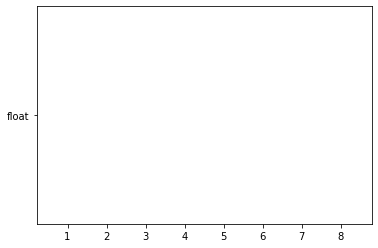

In [22]:
df = pd.DataFrame(stock_dict)